# London Housing Case

## The Data Science Pipeline
Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing 

**2.1. Exploring data** 


In [4]:
#pandas DataFrames
properties.shape
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


**2.2. Cleaning the data**

In [5]:
properties_T = properties.T
properties_T.index

#index
properties_T = properties_T.reset_index()
properties_T.index

# use the iloc[] method to indicate 0
properties_T.columns = properties_T.iloc[0]

# drop() method, passing 0 as the index.
properties_T = properties_T.drop(0)
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,838041,840027,831409,810395,814092,809408,749503,756112,726259,716754
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,329413,328665,333559,335332,336382,334095,341625,337077,338047,338137
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,575091,562453,569243,573831,581268,586101,589731,595477,589992,586982
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,393023,393050,394225,396993,397897,402775,404066,408244,409354,409969
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,519978,524873,515137,503053,506044,532356,530953,547131,544935,553670


**2.3. Cleaning the data (part 2)**


In [6]:
# rename to London_Borough
properties_T = properties_T.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})

properties_T.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,838041,840027,831409,810395,814092,809408,749503,756112,726259,716754
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,329413,328665,333559,335332,336382,334095,341625,337077,338047,338137
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,575091,562453,569243,573831,581268,586101,589731,595477,589992,586982
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,393023,393050,394225,396993,397897,402775,404066,408244,409354,409969
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,519978,524873,515137,503053,506044,532356,530953,547131,544935,553670


**2.4.Transforming the data**

In [7]:
clean_properties = pd.melt(properties_T, id_vars=['London_Borough', 'ID'])
# rename
clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_price'})
clean_properties.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.2266
2,Barnet,E09000003,1995-01-01 00:00:00,93284.51832
3,Bexley,E09000004,1995-01-01 00:00:00,64958.09036
4,Brent,E09000005,1995-01-01 00:00:00,71306.56698


In [8]:
clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'])
clean_properties.dtypes

clean_properties.count()

London_Borough    17184
ID                16110
Month             17184
Average_price     16110
dtype: int64

**2.5. Cleaning the data (part 3)**


In [9]:
clean_properties['London_Borough'].unique()

NaNFreeDF1 = clean_properties[clean_properties['Average_price'].notna()]

NaNFreeDF2 = clean_properties.dropna()
NaNFreeDF2['London_Borough'].unique()

nonBoroughs = ['Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England']

NaNFreeDF2 = NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(nonBoroughs)]
NaNFreeDF2.head()

df= NaNFreeDF2
df.head()
df.dtypes

London_Borough     object
ID                 object
Month              object
Average_price     float64
dtype: object

**2.6. Visualizing the data**

C:\Users\oouje\anaconda3\envs\AJ\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


Text(0, 0.5, 'Price')

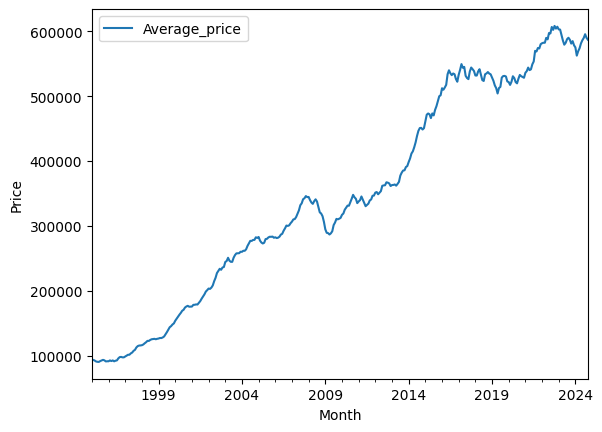

In [10]:
barnet_prices = df[df['London_Borough'] == 'Barnet']

ax = barnet_prices.plot(kind='line', y= 'Average_price', x= 'Month')

ax.set_ylabel('Price')

In [11]:
# apply a lambda function
df['Year'] = df['Month'].apply(lambda t: t.year)

df.tail()

,London_Borough,ID,Month,Average_price,Year
17164,Sutton,E09000029,2024-10-01 00:00:00,444838.0,2024
17165,Tower Hamlets,E09000030,2024-10-01 00:00:00,495186.0,2024
17166,Waltham Forest,E09000031,2024-10-01 00:00:00,512963.0,2024
17167,Wandsworth,E09000032,2024-10-01 00:00:00,606527.0,2024
17168,Westminster,E09000033,2024-10-01 00:00:00,959769.0,2024


In [12]:
# Using the function 'groupby'
dfg = df.groupby(by=['London_Borough', 'Year']).mean(numeric_only = True)
dfg.sample(10)

,,Average_price
London_Borough,Year,
Croydon,1995,68923.340845
Hackney,2018,544644.929350
Kensington & Chelsea,1998,268350.122142
Croydon,2006,212111.336650
Islington,2022,692641.500000
Havering,2003,179117.781233
Hounslow,1996,73886.734233
Islington,2004,285947.162592
Tower Hamlets,2005,225629.018725


In [13]:
dfg = dfg.reset_index()
dfg.head()

,London_Borough,Year,Average_price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.


In [14]:
def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2018 = float(d['Average_price'][d['Year']==2018])
    ratio = [y2018/y1998]
    return ratio
create_price_ratio(dfg[dfg['London_Borough'] == 'Barking & Dagenham'])

C:\Users\oouje\AppData\Local\Temp\ipykernel_5588\834800462.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y1998 = float(d['Average_price'][d['Year']==1998])
C:\Users\oouje\AppData\Local\Temp\ipykernel_5588\834800462.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y2018 = float(d['Average_price'][d['Year']==2018])


[4.896427058975681]

In [15]:
final = {}

In [16]:
for b in dfg['London_Borough'].unique():
    borough = dfg[dfg['London_Borough']== b]
    final[b] = create_price_ratio(borough)
print(final)

{'Barking & Dagenham': [4.896427058975681], 'Barnet': [4.357783676819685], 'Bexley': [4.249834699867197], 'Brent': [4.89546308358166], 'Bromley': [4.094845613646759], 'Camden': [4.9340441155498205], 'City of London': [5.302624343763008], 'Croydon': [4.200984673734846], 'Ealing': [4.3117723039863], 'Enfield': [4.2627483817748235], 'Greenwich': [4.763566039512672], 'Hackney': [6.19833625346378], 'Hammersmith & Fulham': [4.138939665327364], 'Haringey': [5.134552879755683], 'Harrow': [4.05915059005276], 'Havering': [4.325869023358387], 'Hillingdon': [4.200284169489838], 'Hounslow': [3.9770733399593667], 'Islington': [4.841877893323641], 'Kensington & Chelsea': [5.0821745438347845], 'Kingston upon Thames': [4.270037076553341], 'Lambeth': [4.9581945667801675], 'Lewisham': [5.447912042607786], 'Merton': [4.745151276122173], 'Newham': [5.307655931799601], 'Redbridge': [4.4701898316864215], 'Richmond upon Thames': [4.002759928862856], 'Southwark': [5.516371542388441], 'Sutton': [4.1188674603889

C:\Users\oouje\AppData\Local\Temp\ipykernel_5588\834800462.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y1998 = float(d['Average_price'][d['Year']==1998])
C:\Users\oouje\AppData\Local\Temp\ipykernel_5588\834800462.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y2018 = float(d['Average_price'][d['Year']==2018])


In [17]:
df_ratios = pd.DataFrame(final)
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,4.896427,4.357784,4.249835,4.895463,4.094846,4.934044,5.302624,4.200985,4.311772,4.262748,...,4.745151,5.307656,4.47019,4.00276,5.516372,4.118867,4.626735,5.835127,4.757575,5.352731


In [18]:
df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()
df_ratios.head()

,index,0
0,Barking & Dagenham,4.896427
1,Barnet,4.357784
2,Bexley,4.249835
3,Brent,4.895463
4,Bromley,4.094846


In [19]:
df_ratios.rename(columns={'index':'Borough', 0:'2018'}, inplace=True)
df_ratios.head()

,Borough,2018
0,Barking & Dagenham,4.896427
1,Barnet,4.357784
2,Bexley,4.249835
3,Brent,4.895463
4,Bromley,4.094846


In [20]:
top_15 = df_ratios.sort_values(by='2018', ascending = False).head(15)

print(top_15)

                 Borough      2018
11               Hackney  6.198336
30        Waltham Forest  5.835127
27             Southwark  5.516372
22              Lewisham  5.447912
32           Westminster  5.352731
24                Newham  5.307656
6         City of London  5.302624
13              Haringey  5.134553
19  Kensington & Chelsea  5.082175
21               Lambeth  4.958195
5                 Camden  4.934044
0     Barking & Dagenham  4.896427
3                  Brent  4.895463
18             Islington  4.841878
10             Greenwich  4.763566


[Text(0, 0, 'Hackney'),
 Text(0, 0, 'Waltham Forest'),
 Text(0, 0, 'Southwark'),
 Text(0, 0, 'Lewisham'),
 Text(0, 0, 'Westminster'),
 Text(0, 0, 'Newham'),
 Text(0, 0, 'City of London'),
 Text(0, 0, 'Haringey'),
 Text(0, 0, 'Kensington & Chelsea'),
 Text(0, 0, 'Lambeth'),
 Text(0, 0, 'Camden'),
 Text(0, 0, 'Barking & Dagenham'),
 Text(0, 0, 'Brent'),
 Text(0, 0, 'Islington'),
 Text(0, 0, 'Greenwich')]

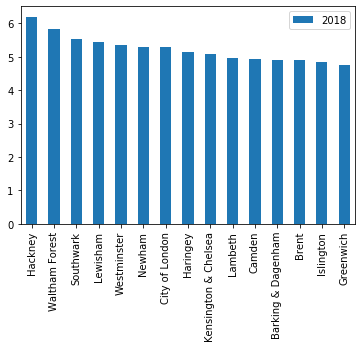

In [52]:
ax = top_15[['Borough', '2018']].plot(kind='bar')

ax.set_xticklabels(top_15.Borough)

In [21]:
dfg.max()

London_Borough    Westminster
Year                     2024
Average_price       1447111.0
dtype: object

In [22]:
top_15_table = pd.melt(top_15, id_vars= ['Borough'])
print(top_15_table)

                 Borough variable     value
0                Hackney     2018  6.198336
1         Waltham Forest     2018  5.835127
2              Southwark     2018  5.516372
3               Lewisham     2018  5.447912
4            Westminster     2018  5.352731
5                 Newham     2018  5.307656
6         City of London     2018  5.302624
7               Haringey     2018  5.134553
8   Kensington & Chelsea     2018  5.082175
9                Lambeth     2018  4.958195
10                Camden     2018  4.934044
11    Barking & Dagenham     2018  4.896427
12                 Brent     2018  4.895463
13             Islington     2018  4.841878
14             Greenwich     2018  4.763566
